In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import powerlaw

In [84]:
all_song_stats = pd.read_csv('data/track_data-2022.csv')
all_song_stats.index = ['danceability', 'energy_i', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence_i', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'scored_words', 'valence_l', 'arousal', 'dominance', 'goodness',
       'energy_l', 'structure', 'power', 'danger']

In [85]:
all_song_stats = all_song_stats.transpose()
all_song_stats

,danceability,energy_i,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence_i,...,time_signature,scored_words,valence_l,arousal,dominance,goodness,energy_l,structure,power,danger
"We Don't Talk About Bruno---Carolina Gaitán - La Gaita, Mauro Castillo, Adassa, Rhenzy Feliz, Diane Guerrero, Stephanie Beatriz, Encanto - Cast",0.577,0.45,0,-8.516,0,0.0834,0.357,0,0.111,0.83,...,4,318,0.11564037735849057,-0.09533077987421382,0.022885880503144655,0.12512995911949684,-0.08469031446540881,-0.012425783018867924,0.02859508805031447,-0.14836530817610064
Sacrifice---The Weeknd,0.735,0.795,11,-6.523,0,0.113,0.0296,3.18e-05,0.0678,0.905,...,4,328,0.09867207317073172,-0.05770075609756097,0.014064512195121951,0.10060863414634146,-0.05571964634146341,0.006044807926829267,0.031741314024390246,-0.11054077134146342
Heat Waves---Glass Animals,0.761,0.525,11,-6.9,1,0.0944,0.44,6.7e-06,0.0921,0.531,...,4,389,0.1185455526992288,-0.06787088431876606,0.023261452442159384,0.12371925449871465,-0.06229461696658098,0.003669876606683806,0.04343369665809768,-0.1315316966580977
As It Was---Harry Styles,0.52,0.731,6,-5.338,0,0.0557,0.342,0.00101,0.311,0.662,...,4,454,0.12083242290748901,-0.07513780616740087,0.024457334801762112,0.1273552422907489,-0.0680066321585903,-2.074669603524317e-05,0.041965779735682815,-0.13814170704845816
First Class---Jack Harlow,0.902,0.582,5,-5.902,0,0.109,0.111,3.18e-06,0.111,0.332,...,4,256,0.1439096875,-0.05282928125,0.065766875,0.16384185156250003,-0.030888359375,-0.005281074218749998,0.09401226953125,-0.1376950234375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Shinunoga E-Wa---Fujii Kaze,0.6,0.76,6,-6.124,0,0.0452,0.166,4.09e-05,0.189,0.519,...,4,8,0.10510499999999999,-0.029841,0.04172,0.11531775,-0.018768625000000004,0.005256125,0.068270625,-0.0948135
Hayloft II---Mother Mother,0.326,0.866,9,-4.541,0,0.101,0.0044,7.37e-06,0.0912,0.172,...,4,227,0.0678742731277533,-0.013181859030837002,0.04993310572687224,0.08462813656387665,0.005366779735682816,-0.009122863436123348,0.06363601762114537,-0.05604626431718062
"lovely (with Khalid)---Billie Eilish, Khalid",0.351,0.296,4,-10.109,0,0.0333,0.934,0,0.095,0.12,...,4,302,0.11985086092715233,-0.06331699337748344,0.03003043046357616,0.12742519205298014,-0.055076294701986765,0.0021135827814569544,0.051158354304635764,-0.1290480132450331
DNA.---Kendrick Lamar,0.638,0.523,1,-6.664,1,0.357,0.00454,0,0.0842,0.422,...,4,459,0.10762923747276688,-0.057336370370370364,0.0319887908496732,0.11691919389978213,-0.04713099128540305,-0.001819326797385621,0.049347653594771244,-0.11600099128540306


<Axes: xlabel='scored_words', ylabel='Density'>

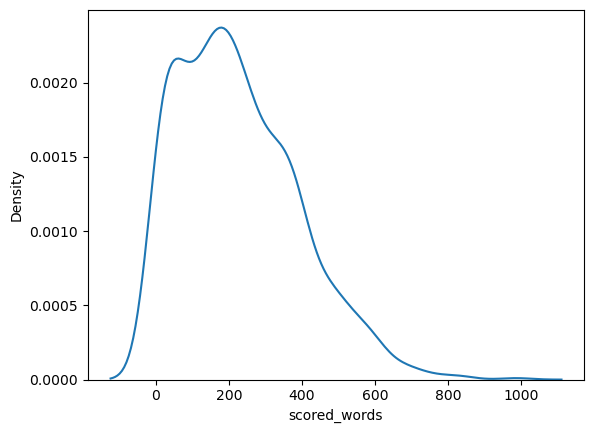

In [12]:
sns.kdeplot(all_song_stats['scored_words'].astype(int))

(array([54., 16., 27., 19., 14., 19., 18., 18., 20., 13., 17., 14., 15.,
        18.,  9., 15., 21., 17., 19., 20., 23., 25., 17., 13., 22.]),
 array([  0.  ,   7.96,  15.92,  23.88,  31.84,  39.8 ,  47.76,  55.72,
         63.68,  71.64,  79.6 ,  87.56,  95.52, 103.48, 111.44, 119.4 ,
        127.36, 135.32, 143.28, 151.24, 159.2 , 167.16, 175.12, 183.08,
        191.04, 199.  ]),
 <BarContainer object of 25 artists>)

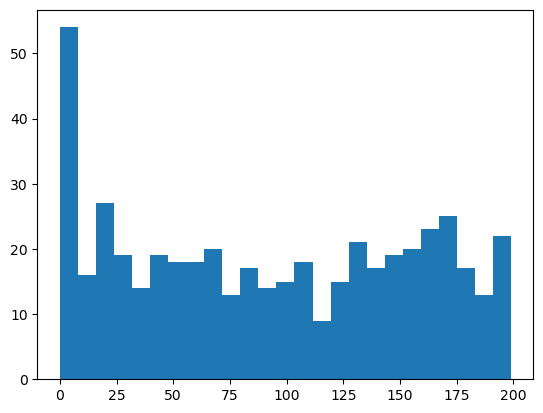

In [17]:
plt.hist(all_song_stats[all_song_stats['scored_words'].astype(int)<200]['scored_words'].astype(int),bins=25)

In [86]:
song_stats = all_song_stats[all_song_stats['scored_words'].astype(int)>100]

In [223]:
song_stats['valence_i'] = song_stats['valence_i'].astype(float)
song_stats['valence_l'] = song_stats['valence_l'].astype(float)
song_stats['scored_words'] = song_stats['scored_words'].astype(int)
song_stats['power'] = song_stats['power'].astype(float)
song_stats['danger'] = song_stats['danger'].astype(float)
song_stats['structure'] = song_stats['structure'].astype(float)
song_stats['loudness'] = song_stats['loudness'].astype(float)
song_stats['energy_i'] = song_stats['energy_i'].astype(float)

/var/folders/hm/ck7xwlk95kz6g9s23gwq0x_r0000gn/T/ipykernel_13692/3283542538.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/hm/ck7xwlk95kz6g9s23gwq0x_r0000gn/T/ipykernel_13692/3283542538.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/hm/ck7xwlk95kz6g9s23gwq0x_r0000gn/T/ipykernel_13692/3283542538.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [88]:
song_stats['name+artist'] = song_stats.index

/var/folders/hm/ck7xwlk95kz6g9s23gwq0x_r0000gn/T/ipykernel_13692/238078291.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
# px.scatter(song_stats['valence_i'].astype(float),song_stats['valence_l'].astype(float),hover_data=song_stats.index)

px.scatter(song_stats, x="valence_i", y="valence_l", size="scored_words", hover_data=['name+artist'])

In [142]:
import re

def remove_comma_before_dash(input_string):
    return re.sub(r',(?=.*---)', '', input_string)

# Example usage:
input_string = "You're On Your Own, Kid---Taylor Swift"
output_string = remove_comma_before_dash(input_string)
print(output_string)

def remove_parentheses(input_string):
    return re.sub(r'\([^)]*\)', '', input_string)


You're On Your Own Kid---Taylor Swift


In [143]:
song_stats['name+artist'] = song_stats['name+artist'].apply(remove_comma_before_dash)
song_stats['name+artist'] = song_stats['name+artist'].apply(remove_parentheses)

/var/folders/hm/ck7xwlk95kz6g9s23gwq0x_r0000gn/T/ipykernel_13692/4274749419.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/hm/ck7xwlk95kz6g9s23gwq0x_r0000gn/T/ipykernel_13692/4274749419.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [144]:
song_artists = song_stats['name+artist'].str.split('---|,',expand=True)

In [145]:
song_artists

,0,1,2,3,4,5,6,7
"We Don't Talk About Bruno---Carolina Gaitán - La Gaita, Mauro Castillo, Adassa, Rhenzy Feliz, Diane Guerrero, Stephanie Beatriz, Encanto - Cast",We Don't Talk About Bruno,Carolina Gaitán - La Gaita,Mauro Castillo,Adassa,Rhenzy Feliz,Diane Guerrero,Stephanie Beatriz,Encanto - Cast
Sacrifice---The Weeknd,Sacrifice,The Weeknd,None,None,None,None,None,None
Heat Waves---Glass Animals,Heat Waves,Glass Animals,None,None,None,None,None,None
As It Was---Harry Styles,As It Was,Harry Styles,None,None,None,None,None,None
First Class---Jack Harlow,First Class,Jack Harlow,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
Self Care---Mac Miller,Self Care,Mac Miller,None,None,None,None,None,None
Stir Fry---Migos,Stir Fry,Migos,None,None,None,None,None,None
Hayloft II---Mother Mother,Hayloft II,Mother Mother,None,None,None,None,None,None
"lovely (with Khalid)---Billie Eilish, Khalid",lovely,Billie Eilish,Khalid,None,None,None,None,None


In [146]:
for a in song_artists[1].unique():
    print(a)

Carolina Gaitán - La Gaita
The Weeknd
Glass Animals
Harry Styles
Jack Harlow
Kendrick Lamar
Kate Bush
Joji
Steve Lacy
Sam Smith
Taylor Swift
Drake
Gunna
Kodak Black
Nicki Minaj
Lil Nas X
Morgan Wallen
Future
Post Malone
d4vd
Jessica Darrow
Nirvana
The Kid LAROI
Zach Bryan
Juice WRLD
Olivia Rodrigo
Beyoncé
GAYLE
Megan Thee Stallion
Imagine Dragons
Lizzo
DJ Khaled
Adele
The Game
Lil Tjay
Doja Cat
OneRepublic
BLACKPINK
Lil Yachty
Lil Uzi Vert
Fivio Foreign
The Walters
Kanye West
Metallica
Marshmello
Dove Cameron
Lil Baby
J. Cole
Pharrell Williams
Stephanie Beatriz
Dr. Dre
Labrinth
Shawn Mendes
Omar Apollo
Mariah Carey
Lil Durk
Justin Bieber
The Neighbourhood
Frank Ocean
Cardi B
JVKE
SZA
Kevin Gates
WILLOW
Elton John
Diane Guerrero
Charlie Puth
Camila Cabello
Yeat
King Von
Arctic Monkeys
Yung Gravy
Billie Eilish
Ed Sheeran
Machine Gun Kelly
Tate McRae
Nicky Youre
Chris Brown
Baby Keem
Tyga
Brent Faiyaz
THE ANXIETY
NAV
Nardo Wick
Bailey Zimmerman
Calvin Harris
Meghan Trainor
Playboi Carti
T

In [147]:
song_stats['artist'] = song_artists[1]

/var/folders/hm/ck7xwlk95kz6g9s23gwq0x_r0000gn/T/ipykernel_13692/4083195160.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [148]:
scored_words = song_stats[['artist','scored_words']]
artist_scored_words = scored_words.groupby(by='artist').sum().reset_index()

In [149]:
song_stats_float = song_stats[['danceability',
 'energy_i',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence_i',
 'tempo',
 'valence_l',
 'arousal',
 'dominance',
 'goodness',
 'energy_l',
 'structure',
 'power',
 'danger']]

In [150]:
song_stats_float = song_stats_float.astype(float)
song_stats_float['artist'] = song_stats['artist']

In [384]:
for col in song_stats_float.columns[:-1]:
    song_stats[col] = song_stats[col].astype(float)

/var/folders/hm/ck7xwlk95kz6g9s23gwq0x_r0000gn/T/ipykernel_13692/1843859628.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/hm/ck7xwlk95kz6g9s23gwq0x_r0000gn/T/ipykernel_13692/1843859628.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/hm/ck7xwlk95kz6g9s23gwq0x_r0000gn/T/ipykernel_13692/1843859628.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [151]:
song_stats_float

,danceability,energy_i,loudness,speechiness,acousticness,instrumentalness,liveness,valence_i,tempo,valence_l,arousal,dominance,goodness,energy_l,structure,power,danger,artist
"We Don't Talk About Bruno---Carolina Gaitán - La Gaita, Mauro Castillo, Adassa, Rhenzy Feliz, Diane Guerrero, Stephanie Beatriz, Encanto - Cast",0.577,0.450,-8.516,0.0834,0.35700,0.000000,0.1110,0.830,205.863,0.115640,-0.095331,0.022886,0.125130,-0.084690,-0.012426,0.028595,-0.148365,Carolina Gaitán - La Gaita
Sacrifice---The Weeknd,0.735,0.795,-6.523,0.1130,0.02960,0.000032,0.0678,0.905,122.000,0.098672,-0.057701,0.014065,0.100609,-0.055720,0.006045,0.031741,-0.110541,The Weeknd
Heat Waves---Glass Animals,0.761,0.525,-6.900,0.0944,0.44000,0.000007,0.0921,0.531,80.870,0.118546,-0.067871,0.023261,0.123719,-0.062295,0.003670,0.043434,-0.131532,Glass Animals
As It Was---Harry Styles,0.520,0.731,-5.338,0.0557,0.34200,0.001010,0.3110,0.662,173.930,0.120832,-0.075138,0.024457,0.127355,-0.068007,-0.000021,0.041966,-0.138142,Harry Styles
First Class---Jack Harlow,0.902,0.582,-5.902,0.1090,0.11100,0.000003,0.1110,0.332,107.005,0.143910,-0.052829,0.065767,0.163842,-0.030888,-0.005281,0.094012,-0.137695,Jack Harlow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Self Care---Mac Miller,0.520,0.538,-8.109,0.2060,0.36700,0.001870,0.1190,0.177,141.894,0.077803,-0.071688,0.015544,0.085386,-0.063129,-0.012575,0.015738,-0.105016,Mac Miller
Stir Fry---Migos,0.817,0.816,-5.402,0.2690,0.00263,0.000000,0.1590,0.508,181.982,0.100084,-0.046111,0.033205,0.109312,-0.036007,-0.000147,0.051834,-0.102756,Migos
Hayloft II---Mother Mother,0.326,0.866,-4.541,0.1010,0.00440,0.000007,0.0912,0.172,178.181,0.067874,-0.013182,0.049933,0.084628,0.005367,-0.009123,0.063636,-0.056046,Mother Mother
"lovely (with Khalid)---Billie Eilish, Khalid",0.351,0.296,-10.109,0.0333,0.93400,0.000000,0.0950,0.120,115.284,0.119851,-0.063317,0.030030,0.127425,-0.055076,0.002114,0.051158,-0.129048,Billie Eilish


In [152]:
artist_means = song_stats_float.groupby(by="artist").mean().reset_index()

In [153]:
artist_means = artist_means.merge(right=artist_scored_words,on='artist')

In [154]:
artist_means

,artist,danceability,energy_i,loudness,speechiness,acousticness,instrumentalness,liveness,valence_i,tempo,valence_l,arousal,dominance,goodness,energy_l,structure,power,danger,scored_words
0,$NOT,0.75300,0.7770,-5.7010,0.32000,0.07250,0.000714,0.1250,0.6690,157.1480,0.112300,-0.079966,0.013723,0.115539,-0.076448,0.000662,0.027641,-0.135755,147
1,$uicideboy$,0.77330,0.7163,-5.6885,0.14923,0.16481,0.000237,0.1721,0.4478,132.7861,0.091048,-0.065496,0.020130,0.098108,-0.057647,-0.006027,0.028610,-0.110135,2708
2,21 Savage,0.76275,0.6735,-7.4700,0.18355,0.03631,0.000364,0.2030,0.2940,148.7905,0.112400,-0.045426,0.055854,0.130750,-0.025128,-0.009485,0.074686,-0.110222,1415
3,24kGoldn,0.70100,0.7160,-3.6710,0.03610,0.17400,0.000000,0.3240,0.7320,91.0070,0.081160,-0.071346,0.008445,0.084816,-0.067231,-0.005894,0.012435,-0.107513,200
4,2Pac,0.76300,0.8500,-3.0520,0.04170,0.03040,0.000001,0.3710,0.7610,91.5190,0.113059,-0.080808,0.030832,0.124557,-0.067989,-0.011218,0.040000,-0.136151,379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,blink-182,0.58700,0.8660,-2.8640,0.05710,0.00297,0.000000,0.1360,0.6300,145.9160,0.120574,-0.079935,0.010132,0.120952,-0.079689,0.007107,0.029177,-0.141875,261
277,d4vd,0.57100,0.5010,-9.9480,0.02785,0.49850,0.004071,0.2225,0.2575,132.0385,0.130037,-0.061610,0.041509,0.141494,-0.049070,0.000008,0.065353,-0.134749,439
278,j-hope,0.78300,0.7220,-4.8640,0.03570,0.00537,0.002090,0.1050,0.3060,97.0310,0.159799,-0.067556,0.046455,0.170468,-0.056042,0.007591,0.080911,-0.160167,105
279,lil Shordie Scott,0.76300,0.5010,-15.1870,0.11600,0.27800,0.674000,0.0907,0.3320,139.4140,0.113237,-0.060253,0.037528,0.124865,-0.047429,-0.004543,0.054756,-0.121830,101


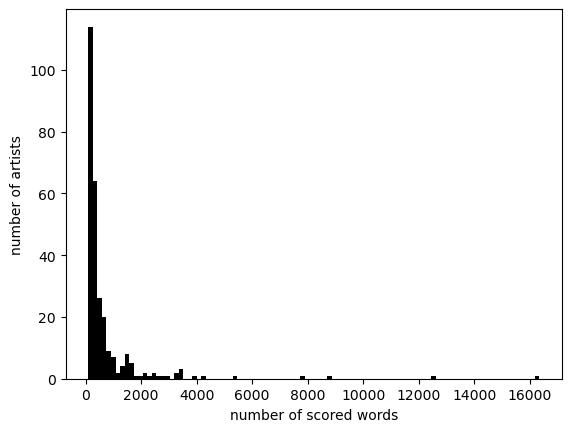

In [378]:
plt.hist(artist_means['scored_words'],bins=100,color='k')
plt.xlabel('number of scored words')
plt.ylabel('number of artists')
plt.savefig('figures/scored_words_dist-linear.png',dpi=600,bbox_inches='tight')

In [156]:
artist_means.sort_values('scored_words')

,artist,danceability,energy_i,loudness,speechiness,acousticness,instrumentalness,liveness,valence_i,tempo,valence_l,arousal,dominance,goodness,energy_l,structure,power,danger,scored_words
279,lil Shordie Scott,0.763000,0.501000,-15.187000,0.116000,0.278000,0.674000,0.090700,0.332000,139.414000,0.113237,-0.060253,0.037528,0.124865,-0.047429,-0.004543,0.054756,-0.121830,101
87,Gerry Rafferty,0.783000,0.322000,-15.091000,0.034300,0.213000,0.002430,0.114000,0.770000,128.226000,0.157235,-0.085535,0.032551,0.164244,-0.078003,0.006144,0.060982,-0.171295,102
156,Meghan Trainor,0.838000,0.525000,-3.562000,0.066500,0.345000,0.000002,0.077100,0.884000,144.981000,0.153095,-0.064783,0.040643,0.161466,-0.055836,0.009900,0.074692,-0.153655,104
278,j-hope,0.783000,0.722000,-4.864000,0.035700,0.005370,0.002090,0.105000,0.306000,97.031000,0.159799,-0.067556,0.046455,0.170468,-0.056042,0.007591,0.080911,-0.160167,105
130,Lauren Spencer Smith,0.684000,0.449000,-9.738000,0.611000,0.869000,0.000000,0.088100,0.341000,66.165000,0.149158,-0.074835,0.046798,0.162529,-0.060164,-0.001700,0.072383,-0.157468,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Harry Styles,0.606313,0.550562,-7.011563,0.052525,0.422312,0.068665,0.170712,0.510387,129.302188,0.138650,-0.078934,0.023108,0.142662,-0.074712,0.007359,0.048048,-0.153706,5337
67,Drake,0.713926,0.544444,-8.207111,0.202237,0.119227,0.005985,0.204396,0.304285,124.727148,0.106407,-0.054361,0.027559,0.113287,-0.046883,0.002269,0.046955,-0.113257,7886
247,The Weeknd,0.586480,0.653520,-6.921720,0.078572,0.210280,0.011671,0.236804,0.436508,121.338200,0.115348,-0.061437,0.023583,0.120151,-0.056302,0.005426,0.045148,-0.124771,8738
120,Kendrick Lamar,0.657720,0.582920,-8.365320,0.222232,0.377257,0.000570,0.147984,0.506520,120.692640,0.107678,-0.060820,0.042844,0.122708,-0.044128,-0.011171,0.055564,-0.117970,12479


In [167]:
# artist_means.to_csv('data/artist_means.csv',index=False)
artist_means = pd.read_csv('data/artist_means.csv')

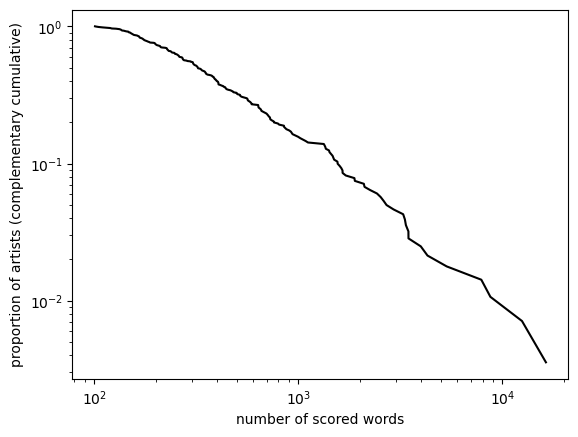

In [379]:
powerlaw.plot_ccdf(artist_means['scored_words'],color='k')
plt.xlabel('number of scored words')
plt.ylabel('proportion of artists (complementary cumulative)')
plt.savefig('figures/scored_words_dist-ccdf.png',dpi=600,bbox_inches='tight')

<Axes: >

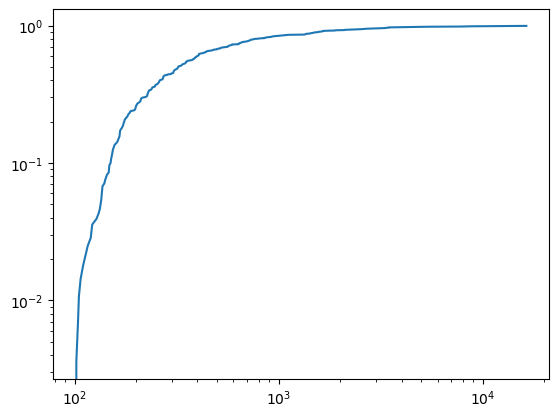

In [158]:
powerlaw.plot_cdf(artist_means['scored_words'])

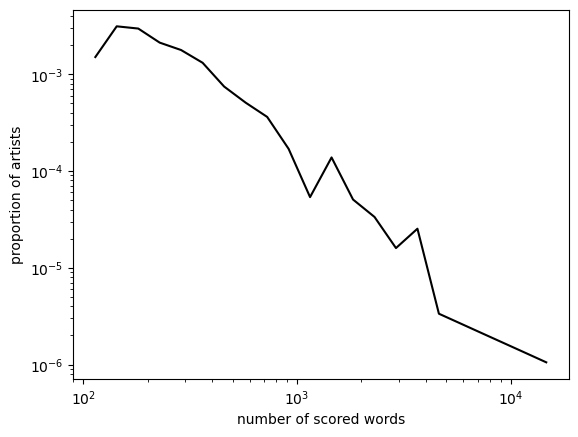

In [380]:
powerlaw.plot_pdf(artist_means['scored_words'],color='k')
plt.xlabel('number of scored words')
plt.ylabel('proportion of artists')
plt.savefig('figures/scored_words_dist-pdf.png',dpi=600,bbox_inches='tight')

In [374]:
# fig = px.scatter(artist_means, x="power", y="danger", size="scored_words", hover_data=['artist'])
# fig.write_image('figures/artist_pd.png',scale=5.)

fig = px.scatter(artist_means, x="power", y="danger", size="scored_words", color="genre", hover_data=['artist'])
# Show the plot
fig.write_image('figures/artist_pd.png',scale=10.)
fig.show()

In [198]:
print(fig['data'][0]['legendgroup'])
print(fig['data'][0]['marker']['color'])
color_dict = dict([(fig['data'][i]['legendgroup'],fig['data'][i]['marker']['color']) for i in range(len(fig['data']))])
print(color_dict)

hip hop
#636efa
{'hip hop': '#636efa', 'niche or unknown': '#EF553B', 'indie': '#00cc96', 'pop': '#ab63fa', 'rock': '#FFA15A', 'country': '#19d3f3', 'r&b': '#FF6692', 'jazz': '#B6E880', 'reggae': '#FF97FF'}


In [392]:
len(artist_means)

281

In [375]:
fig = px.scatter(artist_means[artist_means['scored_words']>500], x="power", y="danger", size="scored_words", color='genre', color_discrete_map=color_dict, hover_data=['artist'])

# Show the plot
fig.write_image('figures/artist_pd-filtered.png',scale=10.)
fig.show()

In [221]:
px.scatter(artist_means[artist_means['scored_words']>500], x="power", y="loudness", size="scored_words", color='genre', color_discrete_map=color_dict, hover_data=['artist'])


In [204]:
artist_genre_dict = dict(zip(artist_means['artist'].tolist(),artist_means['genre'].tolist()))
song_stats['genre'] = song_stats['artist'].map(artist_genre_dict)

/var/folders/hm/ck7xwlk95kz6g9s23gwq0x_r0000gn/T/ipykernel_13692/2640317622.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [376]:
fig = px.scatter(song_stats, x="valence_i", y="valence_l", size="scored_words", color="genre",
                 labels={"valence_i":"valence of instrumental", "valence_l":"valence of lyrics"}, 
                 color_discrete_map=color_dict, hover_data=['name+artist'])

# Show the plot
fig.write_image('figures/song_valence.png',scale=10.)
fig.show()

In [394]:
slope, intercept, r, p, se = stats.linregress(song_stats["valence_i"], song_stats['valence_l'] )
print(r, p)

0.005630464141866273 0.8801177888970093


In [377]:
fig = px.scatter(song_stats, x="power", y="danger", size="scored_words", color="genre", color_discrete_map=color_dict, hover_data=['name+artist'])

fig.write_image('figures/song_pd.png',scale=10.)
fig.show()

In [386]:
fig = px.scatter(song_stats, x="power", y="loudness", size="scored_words", color="genre", color_discrete_map=color_dict, hover_data=['name+artist'])
fig.write_image('figures/song_pl.png',scale=10.)
fig.show()

In [387]:
fig = px.scatter(song_stats, x="power", y="energy_i", size="scored_words", color="genre", color_discrete_map=color_dict, hover_data=['name+artist'])
fig.write_image('figures/song_pl.png',scale=10.)
fig.show()

In [388]:
fig = px.scatter(song_stats, x="danger", y="loudness", size="scored_words", color="genre", color_discrete_map=color_dict, hover_data=['name+artist'])
fig.write_image('figures/song_dl.png',scale=10.)
fig.show()

In [389]:
fig = px.scatter(song_stats, x="danger", y="energy_i", size="scored_words", color="genre", color_discrete_map=color_dict, hover_data=['name+artist'])
fig.write_image('figures/song_de.png',scale=10.)
fig.show()

In [218]:
song_stats.loc['NEW MAGIC WAND---Tyler, The Creator',song_stats.columns[:9].tolist()+song_stats.columns[16:].tolist()]

danceability                                      0.621
energy_i                                           0.73
key                                                   5
loudness                                         -5.414
mode                                                  0
speechiness                                       0.107
acousticness                                     0.0967
instrumentalness                               0.000131
liveness                                          0.673
duration_ms                                      195320
time_signature                                        4
scored_words                                        591
valence_l                                      0.111095
arousal                           -0.034480382402707274
dominance                           0.04204973773265651
goodness                            0.12134277495769882
energy_l                          -0.023372744500846025
structure                                      0

In [236]:
song_stats_meanable = song_stats[song_stats.columns[:9].tolist()+song_stats.columns[16:-3].tolist()]

In [238]:
song_stats_meanable = song_stats_meanable.astype(float)

In [229]:
weekly200 = pd.read_csv('data/weekly_200_df_2022.csv')

In [239]:
song_stats_meanable.loc[[s for s in weekly200['2022-01-06'].tolist() if s in song_stats.index.tolist()]].mean()

danceability             0.656135
energy_i                 0.608482
key                      4.600000
loudness                -6.955529
mode                     0.647059
speechiness              0.113165
acousticness             0.219705
instrumentalness         0.052574
liveness                 0.193123
duration_ms         207222.576471
time_signature           3.964706
scored_words           303.505882
valence_l                0.120428
arousal                 -0.062154
dominance                0.027591
goodness                 0.126576
energy_l                -0.055531
structure                0.004704
power                    0.050236
danger                  -0.128769
dtype: float64

In [292]:
mean_weekly_stats = pd.DataFrame(columns = weekly200.columns, index = song_stats_meanable.columns)
for col in mean_weekly_stats.columns:
    mean_weekly_stats[col] = song_stats_meanable.loc[[s for s in weekly200[col].tolist() if s in song_stats.index.tolist()]].mean()
    

In [293]:
from scipy import stats
def calculate_confidence_interval(column, confidence=0.90):
    mean, sigma = np.mean(column), np.std(column)
    interval = stats.t.interval(confidence, len(column) - 1, loc=mean, scale=sigma/np.sqrt(len(column)))
    return interval

lowlim_weekly_stats = pd.DataFrame(columns = weekly200.columns, index = song_stats_meanable.columns)
for col in mean_weekly_stats.columns:
    for stat in song_stats_meanable.columns:
        lowlim_weekly_stats[col].loc[stat] = calculate_confidence_interval(song_stats_meanable.loc[[s for s in weekly200[col].tolist() if s in song_stats.index.tolist()]][stat])[0]
        
hilim_weekly_stats = pd.DataFrame(columns = weekly200.columns, index = song_stats_meanable.columns)
for col in mean_weekly_stats.columns:
    for stat in song_stats_meanable.columns:
        hilim_weekly_stats[col].loc[stat] = calculate_confidence_interval(song_stats_meanable.loc[[s for s in weekly200[col].tolist() if s in song_stats.index.tolist()]][stat])[1]

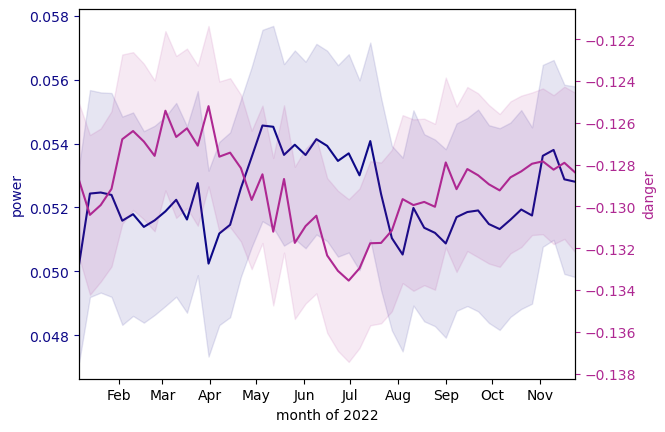

In [349]:
import matplotlib.dates as mdates


# Generate some sample data
x = pd.to_datetime(mean_weekly_stats.columns)
# x = range(len(mean_weekly_stats.columns))
y1 = mean_weekly_stats.loc['power']
y11 = lowlim_weekly_stats.loc['power']
y12 = hilim_weekly_stats.loc['power']
y2 = mean_weekly_stats.loc['danger']
y21 = lowlim_weekly_stats.loc['danger']
y22 = hilim_weekly_stats.loc['danger']

c = [plt.cm.plasma(-200),
plt.cm.plasma(100)]

# Create the first plot with its own y-axis
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color=c[0], label='Line 1')
ax1.set_xlabel('month of 2022')
ax1.set_ylabel('power', color=c[0])
ax1.tick_params('y', colors=c[0])
# ax1.plot(x, y11, color='blue', alpha=.3)
# ax1.plot(x, y12, color='blue', alpha=.3)
ax1.fill_between(x, list(y11), list(y12), color=c[0], alpha=.1)
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax1.set_xlim(pd.to_datetime(mean_weekly_stats.columns)[0],pd.to_datetime(mean_weekly_stats.columns)[-1])

# Create the second plot with its own y-axis
ax2 = ax1.twinx()
ax2.plot(x, y2, color=c[1], label='Line 2')
ax2.set_ylabel('danger', color=c[1])
ax2.tick_params('y', colors=c[1])
# ax2.plot(x, y21, color='green', alpha=.3)
# ax2.plot(x, y22, color='green', alpha=.3)
ax2.fill_between(x, list(y21), list(y22), color=c[1], alpha=.1)


# # Add a legend
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# plt.title('Two Lines with Separate Y-Axes')
plt.savefig('figures/power_danger_time-all.png',dpi=600,bbox_inches='tight')
plt.show()

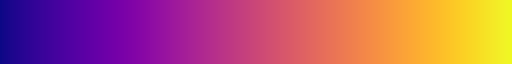

In [350]:
plt.cm.plasma

In [329]:
plt.cm.viridis(10000)

(0.993248, 0.906157, 0.143936, 1.0)

In [291]:
song_stats_meanable.loc[[s for s in weekly200[col].tolist()[-100:] if s in song_stats.index.tolist()]].mean()

danceability             0.634662
energy_i                 0.549558
key                      5.311688
loudness                -8.113818
mode                     0.519481
speechiness              0.132716
acousticness             0.278768
instrumentalness         0.047719
liveness                 0.179939
duration_ms         200868.870130
time_signature           3.883117
scored_words           295.337662
valence_l                0.124547
arousal                 -0.065187
dominance                0.030216
goodness                 0.131850
energy_l                -0.057267
structure                0.003212
power                    0.052738
danger                  -0.133726
dtype: float64

In [294]:
mean_weekly_stats_100 = pd.DataFrame(columns = weekly200.columns, index = song_stats_meanable.columns)
for col in mean_weekly_stats.columns:
    mean_weekly_stats_100[col] = song_stats_meanable.loc[[s for s in weekly200[col].tolist()[-100:] if s in song_stats.index.tolist()]].mean()
    
lowlim_weekly_stats_100 = pd.DataFrame(columns = weekly200.columns, index = song_stats_meanable.columns)
for col in mean_weekly_stats.columns:
    for stat in song_stats_meanable.columns:
        lowlim_weekly_stats_100[col].loc[stat] = calculate_confidence_interval(song_stats_meanable.loc[[s for s in weekly200[col].tolist()[-100:] if s in song_stats.index.tolist()]][stat])[0]
        
hilim_weekly_stats_100 = pd.DataFrame(columns = weekly200.columns, index = song_stats_meanable.columns)
for col in mean_weekly_stats.columns:
    for stat in song_stats_meanable.columns:
        hilim_weekly_stats_100[col].loc[stat] = calculate_confidence_interval(song_stats_meanable.loc[[s for s in weekly200[col].tolist()[-100:] if s in song_stats.index.tolist()]][stat])[1]

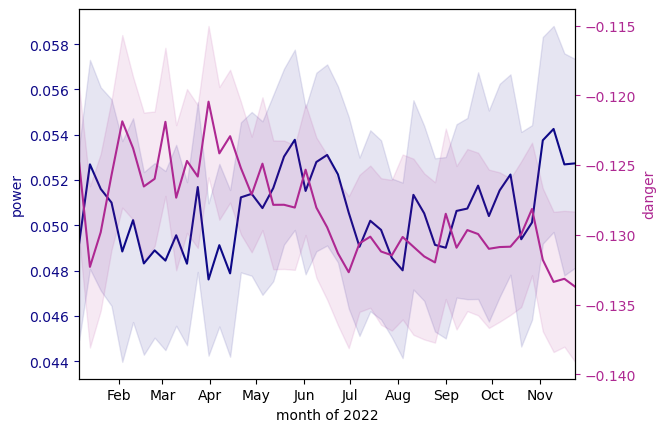

In [351]:
# Generate some sample data
x = pd.to_datetime(mean_weekly_stats_100.columns)
# x = range(len(mean_weekly_stats.columns))
y1 = mean_weekly_stats_100.loc['power']
y11 = lowlim_weekly_stats_100.loc['power']
y12 = hilim_weekly_stats_100.loc['power']
y2 = mean_weekly_stats_100.loc['danger']
y21 = lowlim_weekly_stats_100.loc['danger']
y22 = hilim_weekly_stats_100.loc['danger']

c = [plt.cm.plasma(-200),
plt.cm.plasma(100)]

# Create the first plot with its own y-axis
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color=c[0], label='Line 1')
ax1.set_xlabel('month of 2022')
ax1.set_ylabel('power', color=c[0])
ax1.tick_params('y', colors=c[0])
# ax1.plot(x, y11, color='blue', alpha=.3)
# ax1.plot(x, y12, color='blue', alpha=.3)
ax1.fill_between(x, list(y11), list(y12), color=c[0], alpha=.1)
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax1.set_xlim(pd.to_datetime(mean_weekly_stats.columns)[0],pd.to_datetime(mean_weekly_stats.columns)[-1])

# Create the second plot with its own y-axis
ax2 = ax1.twinx()
ax2.plot(x, y2, color=c[1], label='Line 2')
ax2.set_ylabel('danger', color=c[1])
ax2.tick_params('y', colors=c[1])
# ax2.plot(x, y21, color='green', alpha=.3)
# ax2.plot(x, y22, color='green', alpha=.3)
ax2.fill_between(x, list(y21), list(y22), color=c[1], alpha=.1)
plt.savefig('figures/power_danger_time-100.png',dpi=600,bbox_inches='tight')


# # Add a legend
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# plt.title('Two Lines with Separate Y-Axes')
plt.show()

(array([  1.,   0.,   1.,   4.,   4.,  12.,  25.,  38.,  56.,  74.,  86.,
         75., 110.,  80.,  56.,  42.,  27.,  13.,   8.,   1.,   3.,   2.,
          0.,   1.,   1.]),
 array([-0.03740583, -0.02973261, -0.0220594 , -0.01438618, -0.00671296,
         0.00096025,  0.00863347,  0.01630669,  0.02397991,  0.03165312,
         0.03932634,  0.04699956,  0.05467277,  0.06234599,  0.07001921,
         0.07769242,  0.08536564,  0.09303886,  0.10071207,  0.10838529,
         0.11605851,  0.12373172,  0.13140494,  0.13907816,  0.14675137,
         0.15442459]),
 <BarContainer object of 25 artists>)

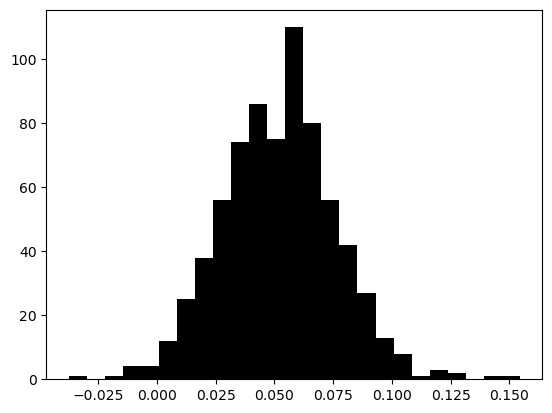

In [356]:
plt.hist(song_stats['power'],bins=25,color='k')

(array([ 6.,  5., 12., 29., 42., 77., 80., 90., 97., 88., 67., 51., 40.,
        17.,  6.,  4.,  3.,  2.,  3.,  1.]),
 array([-0.20250346, -0.19316638, -0.1838293 , -0.17449222, -0.16515514,
        -0.15581806, -0.14648098, -0.1371439 , -0.12780682, -0.11846974,
        -0.10913266, -0.09979558, -0.0904585 , -0.08112142, -0.07178434,
        -0.06244726, -0.05311018, -0.0437731 , -0.03443602, -0.02509894,
        -0.01576186]),
 <BarContainer object of 20 artists>)

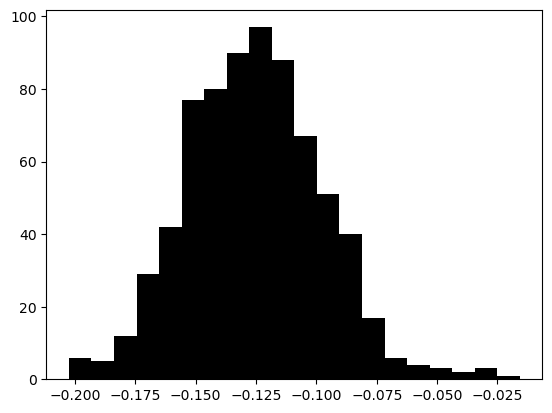

In [358]:
plt.hist(song_stats['danger'],bins=20,color='k')